In [1]:
import mdtraj as md
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq

In [2]:
pdb='./ABL1/ABL1.pdb'
trajectory='./ABL1/ABL1.dcd'
outdir='./week3/output'

trj = md.load(trajectory, top=pdb,stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [3]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])


#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4062

Number of residues: 252

Number of frames: 4000

Starting frame: 0

Last frame: 4000

sequence:  [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER3

In [9]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)


***HOMEWORK Problem 1***

**Use the full DSSP set of secondary structure assignments to plot the population of another secondary structure type and visualize it with a representative frame or frames in VMD**


In [6]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp_full=md.compute_dssp(trj,simplified=False)
dssp=md.compute_dssp(trj,simplified=True)

First, we count the number of each ss structure in the dssp_full result: 

In [7]:
from collections import Counter

flatten_dssp = dssp_full.flatten()

element_count = Counter(flatten_dssp)
element_list = list(element_count.items())


print(element_list)

[(' ', 207354), ('E', 189835), ('S', 115533), ('T', 167850), ('H', 286615), ('B', 7968), ('G', 31795), ('I', 1050)]


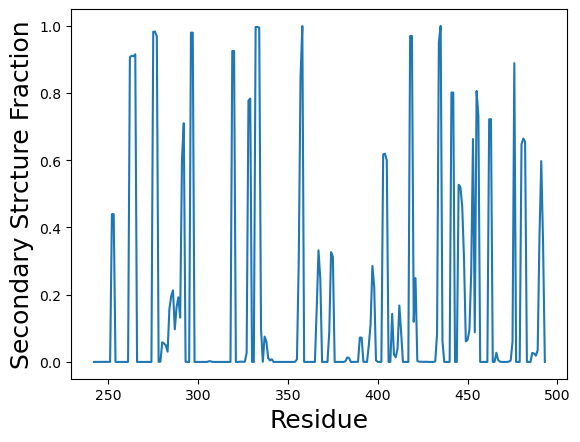

[262 263 264 265 275 276 277 296 297 319 320 332 333 334 358 418 419 434
 435]


In [10]:
# Now we use "T" as example to plot the population.

def get_population(code,dssp):
    code_set = set(dssp.flatten())

    if code not in code_set:
        raise ValueError("Invalid Code. Please double check.")
    
    count = np.array(list(map(lambda x: np.count_nonzero(x==code)/len(x),np.transpose(dssp))))

    return count
    
count_T = get_population("T",dssp_full)

plt.plot(residue_num,count_T)
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.show()

print(np.array(residue_num)[count_T>0.9])

***Challenge Problem #1***

**Write function/efficient loop to calculate all secondary structure populations from the dssp_full definitions 
and write out all residues numbers with > 90% of each seondary structure type**

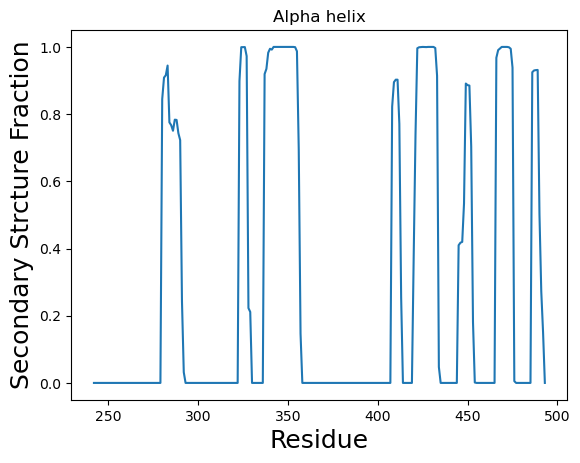

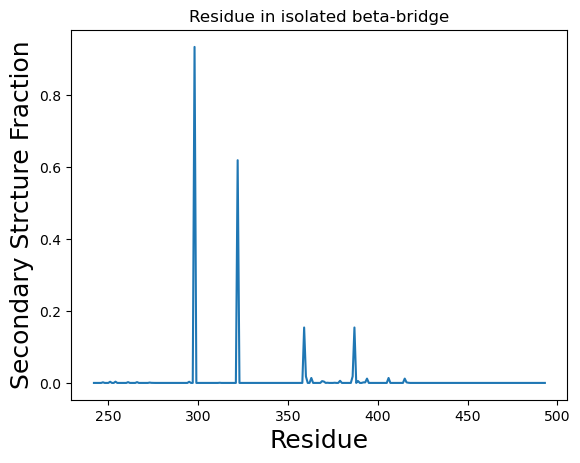

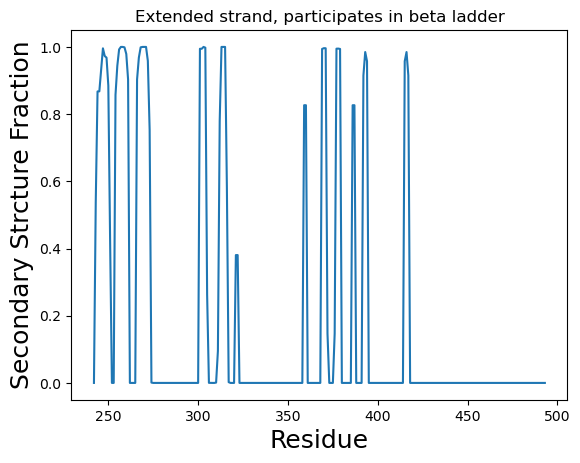

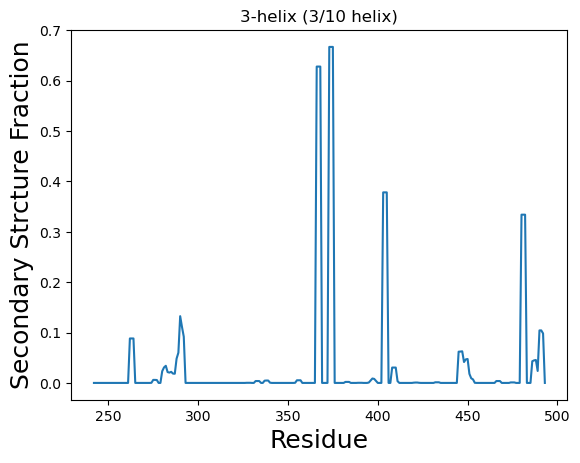

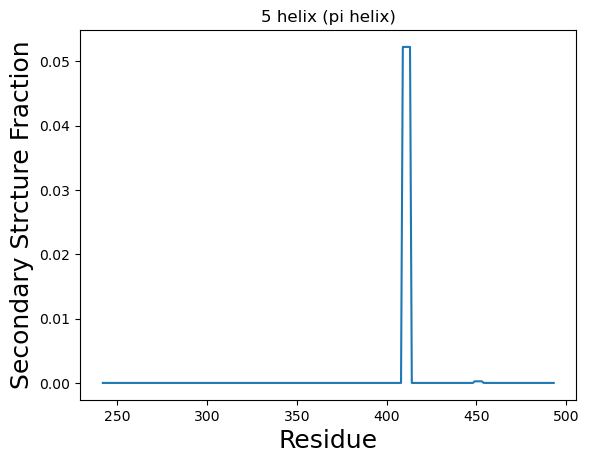

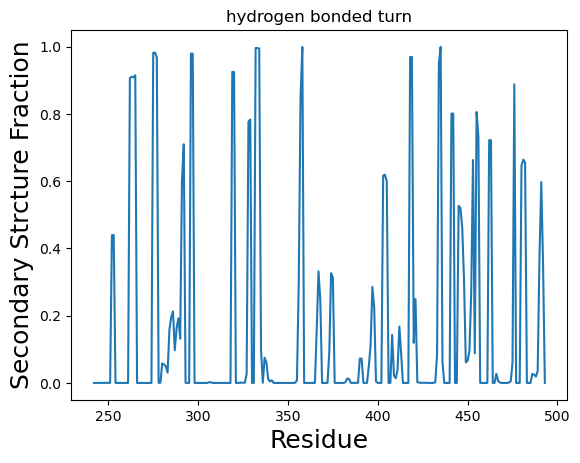

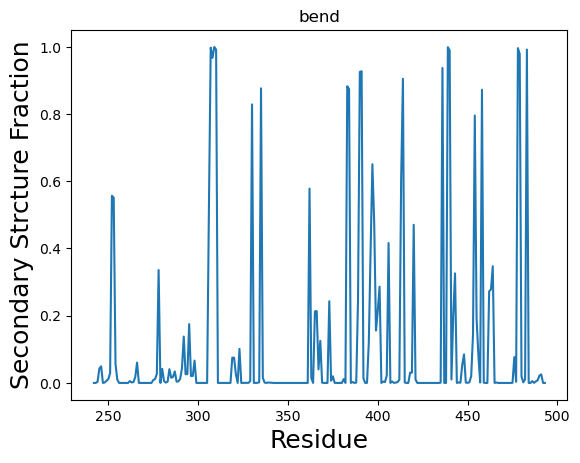

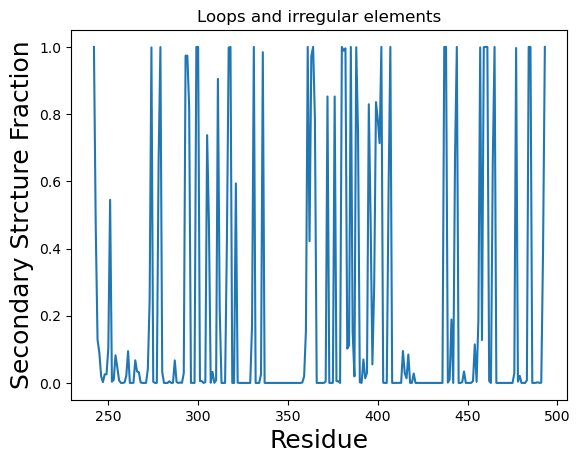

In [11]:
title = {"H" : "Alpha helix", 
      "B" : "Residue in isolated beta-bridge", 
      "E" : "Extended strand, participates in beta ladder", 
      "G" : "3-helix (3/10 helix)", 
      "I" : "5 helix (pi helix)", 
      "T" : "hydrogen bonded turn",
      "S" : "bend", 
      " " : "Loops and irregular elements"}


for code in title.keys():
      count = get_population(code,dssp_full)
      plt.plot(residue_num,count)
      plt.xlabel('Residue', size=18)
      plt.ylabel('Secondary Strcture Fraction', size=18)
      plt.title(title[code])
      plt.show()



In [86]:
#### Write code to output the residue numbers of every residue with > 90% each SS type

for code in title.keys():
    count = get_population(code,dssp_full)
    res_90_id = np.array(residue_num)[count>=0.9]
    result_line = title[code] + ", ".join(res_90_id.astype(str))
    print(result_line)

    

Alpha helix281, 282, 283, 324, 325, 326, 327, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 410, 411, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 486, 487, 488, 489
Residue in isolated beta-bridge298
Extended strand, participates in beta ladder246, 247, 248, 249, 255, 256, 257, 258, 259, 260, 261, 266, 267, 268, 269, 270, 271, 272, 301, 302, 303, 304, 313, 314, 315, 369, 370, 371, 377, 378, 379, 392, 393, 394, 415, 416, 417
3-helix (3/10 helix)
5 helix (pi helix)
hydrogen bonded turn262, 263, 264, 265, 275, 276, 277, 296, 297, 319, 320, 332, 333, 334, 358, 418, 419, 434, 435
bend307, 308, 309, 310, 390, 391, 414, 436, 439, 440, 478, 479, 483
Loops and irregular elements242, 274, 279, 293, 294, 299, 300, 311, 317, 318, 331, 336, 361, 363, 364, 380, 381, 382, 385, 388, 402, 407, 437, 438, 444, 457, 459, 460, 461, 465, 477, 484, 485, 493


***HOMEWORK Problem 2***

**Identify a residue that has a substantial population (>10%) of a second secondary structure assignment 
(for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation**

In [12]:
# Print all residue that has substantial population (>40%) of a secondary structure
possibility_matrix = []
for code in title.keys():
    count = get_population(code,dssp_full)
    possibility_matrix.append(count)

possibility_matrix = np.array(possibility_matrix)

threshold = 0.4
residue_results = [] 


ss_types = list(title.keys())

for res_num, probabilities in zip(residue_num,np.transpose(possibility_matrix)):
    high_probs = []  
    
    for ss_type, prob in zip(ss_types, probabilities):
        if prob > threshold:
            high_probs.append(f"{ss_type} : {prob:.2%}")
    
    if len(high_probs) >= 2:
        residue_results.append(f"res_num {res_num}: " + ", ".join(high_probs))


for result in residue_results:
    print(result)

res_num 243: E : 53.70%,   : 46.30%
res_num 251: E : 42.25%,   : 54.50%
res_num 252: T : 43.95%, S : 55.67%
res_num 253: T : 43.95%, S : 55.15%
res_num 306: S : 51.95%,   : 47.83%
res_num 316: E : 58.17%,   : 41.83%
res_num 362: S : 57.83%,   : 42.18%
res_num 406: S : 41.62%,   : 57.00%
res_num 445: H : 40.98%, T : 52.68%
res_num 446: H : 41.73%, T : 52.00%
res_num 447: H : 41.98%, T : 46.23%


In [88]:
# Select one residue: 446. Select two frames: 3200 and 1000, the secondary structure is Alpha helix and hydrogen bonded turn respectively.
conf_446 = dssp_full[:,np.where(np.array(residue_num) == 446)[0]].flatten()
print(conf_446[3200])
print(conf_446[1000])    

H
T



The snapshots from two different frames illustrate this variation:
- At frame 3200, the carbonyl group of the residue is oriented downwards, facilitating the formation of a hydrogen bond. This orientation integrates the residue into the structure of an alpha helix.
- In contrast, at frame 1000, the carbonyl group is oriented upwards, disfavoring the helical configuration and instead suggesting a coil conformation.


<img src="./Figure 1.png" alt="image1" width="50%" height="auto">

Looking at the ASP444 closed to SER446, we find that the rotation of the side chains ($\chi_{1}$ and $\chi_{2}$) of ASP444 influences the the orientation of SER444: 

<img src="./Figure 2.png" alt="image1" width="50%" height="auto">

In [7]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [9]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

***HOMEWORK Problem 3***

**Identify a residue that has 2 rotameric states and make representative snapshots to illustrate the 2 conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the Chi 1 histogram (or Chi1/Chi2 if the residue has a Chi2 degree of freedom) and add a marking to the plot to indicate the dihedrals shown in your snapshot**

In [19]:
# We select SER348 

print(dihedral_dict['chi1'][348][500])
print(dihedral_dict['chi1'][348][1000])

-0.94533426
1.3478895


<img src="./Figure 3.png" alt="image1" width="50%" height="auto">

From the figure, one can see that the orientation of the amide plane, formed by residues THR345 and ALA344, which are on the same helix as SER348 but located on an adjacent coil, shifts to facilitate the formation of an O-H···O hydrogen bond.

<img src="./Figure 4.png" alt="image1" width="50%" height="auto">

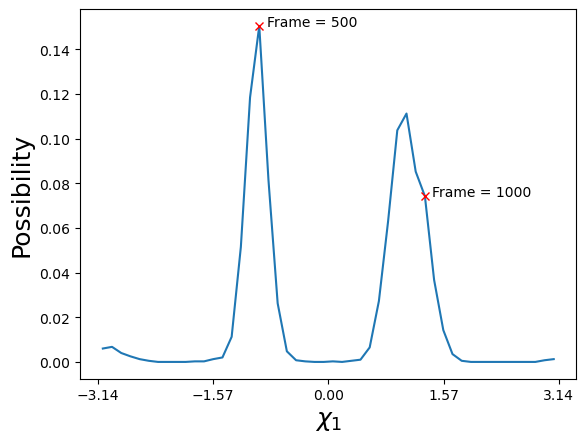

In [24]:
def hist_chi_1(res):
    if res in dihedral_dict['chi1']:
        data = dihedral_dict['chi1'][res]
        hist, bin_edges = np.histogram(data, bins=50)
    else:
        return
    centers = bin_edges[:-1] + np.diff(bin_edges)/2
    return hist/len(data), centers

hist,centers = hist_chi_1(348)


def correct_value_index(centers, value):
    return np.argmin(np.abs(centers-value))

angle_1 = dihedral_dict['chi1'][348][500]
angle_2 = dihedral_dict['chi1'][348][1000]
idx_1 = correct_value_index(centers,angle_1)
idx_2 = correct_value_index(centers,angle_2)


plt.plot(centers,hist)
plt.plot(centers[idx_1],hist[idx_1],marker="x", color = "red", )
plt.text(centers[idx_1]+0.1,hist[idx_1],"Frame = 500")
plt.plot(centers[idx_2],hist[idx_2],marker="x", color = "red", )
plt.text(centers[idx_2]+0.1,hist[idx_2],"Frame = 1000")
plt.ylabel("Possibility", size=18)
plt.xlabel('$\chi_{1}$', size=18)
plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=10)
plt.show()

***HOMEWORK Problem 4***

**Identify a residue that has 2 phi/psi free energy minima states and make representative snapshots to illustrate representative conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the phi/psi histograms and add marking to the plot to indicate the phi/psi angles shown in your snapshot**

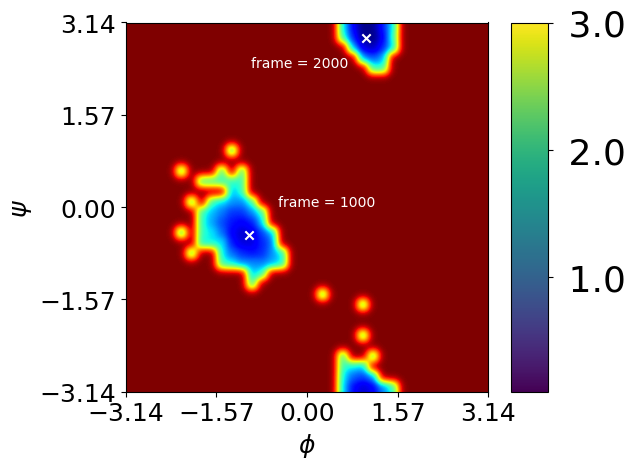

In [38]:

free_energy,xedges,yedges=np.histogram2d(dihedral_dict['psi'][262],dihedral_dict['phi'][262],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
free_energy=np.log(np.flipud(free_energy)+.000001)
T=300                                                                                                  
kbT=T*0.008314/4.184 # kT in kcal/mol
dG=-(kbT)*free_energy #Convert to kcal/mol
plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')


phi_1 = dihedral_dict['phi'][262][1000]
phi_2 = dihedral_dict['phi'][262][2000]

psi_1 = dihedral_dict['psi'][262][1000]
psi_2 = dihedral_dict['psi'][262][2000]

plt.scatter([phi_1,phi_2],[psi_1,psi_2], marker="x",color = "white")
plt.text(phi_1+0.5,psi_1+0.5,"frame = 1000",color = "white")
plt.text(phi_2-2.0,psi_2-0.5,"frame = 2000",color = "white")
cbar_ticks=[0,1,2,3]
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
imaxes = plt.gca()                                                                                                 
plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
plt.xlabel('$\phi$', size=18)
plt.ylabel('$\psi$', size=18)
plt.tick_params(labelsize=18)
plt.axes(cb.ax)
plt.clim(vmin=0.1,vmax=3.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
    




From the figure, one can see that one of the interactions facilitate the second conformation is the C-H···$\pi$ interaction between the side chains of TRP and LYS.

<img src="./Figure 5.png" alt="image1" width="50%" height="auto">

***Challenge Problem 2***

**Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**

To identify these residues, lets' first list all the residues have two distinct $\chi_{1}$ values (i.e. two peaks on the $\chi_{1}$ plot)

In [94]:
from scipy.signal import find_peaks
from scipy.stats import vonmises


def find_peaks_chi1(res):
    data = dihedral_dict['chi1'][res]
    extended_theta = np.linspace(-2*np.pi, 2*np.pi, 400)
    extended_data = np.concatenate([data, data + 2*np.pi * (data < 0), data - 2*np.pi * (data > 0)])


    kappa = 4 
    extended_kde = np.zeros(len(extended_theta))
    for angle in extended_data:
        extended_kde += vonmises.pdf(extended_theta, kappa, loc=angle)

    extended_kde /= np.trapz(extended_kde, extended_theta)

    peaks, _ = find_peaks(extended_kde)

    # Filter peaks that are within the original range -pi to pi
    valid_peaks = peaks[(extended_theta[peaks] >= -np.pi) & (extended_theta[peaks] <= np.pi)]
    
    return extended_theta[valid_peaks]

def correct_peak_index(centers, peaks):
    index = []
    for peak in peaks:
        index.append(np.argmin(np.abs(centers-peak)))
    
    return np.array(index)



In [128]:
from tqdm import tqdm

two_state_res = []

for res in tqdm(residue_num):
    if res in dihedral_dict['chi1']:
        hist,centers = hist_chi_1(res)
        peak_chi = find_peaks_chi1(res)

        if len(peak_chi) == 2:
            hist,centers = hist_chi_1(res)
            peak_idx = correct_peak_index(centers, peak_chi)
            if (hist[peak_idx[0]]/hist[peak_idx[1]] < 5) and (hist[peak_idx[0]]/hist[peak_idx[1]] > 0.2):
                two_state_res.append(res)

print(two_state_res)


100%|██████████| 252/252 [02:55<00:00,  1.44it/s]

[243, 253, 256, 258, 267, 277, 284, 299, 313, 319, 322, 323, 341, 348, 358, 363, 376, 381, 384, 386, 389, 406, 414, 422, 429, 431, 437, 470, 479, 481, 483, 490]


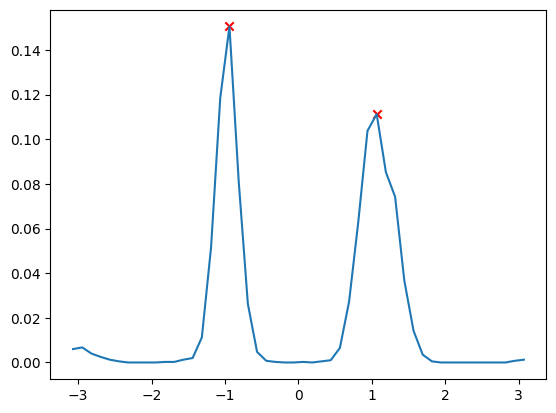

In [168]:
# Here's an example of the plot and peak identified:

hist,centers = hist_chi_1(348)
peak_chi = find_peaks_chi1(348)
peak_idx = correct_peak_index(centers, peak_chi)


plt.plot(centers,hist)
plt.scatter(centers[peak_idx],hist[peak_idx],marker="x", color = "red")
plt.show()

In [172]:
def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.title(str(res))
 plt.show()
 return




In [ ]:
# Now we browsing through all the Ramachandran plots to identify which of them have two basins
for res in two_state_res:

    plot_phipsi(res)

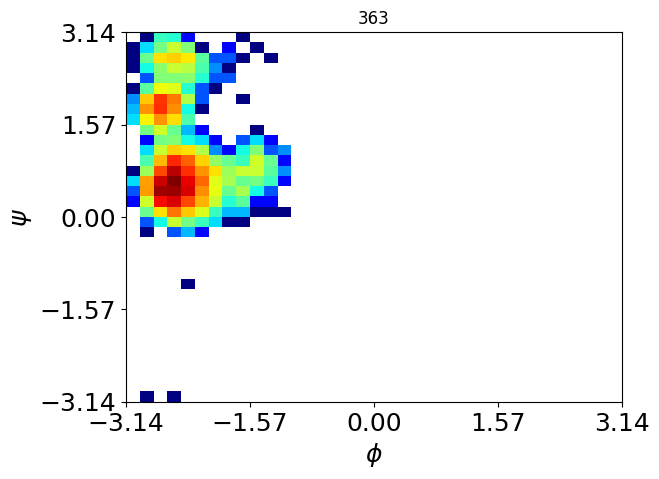

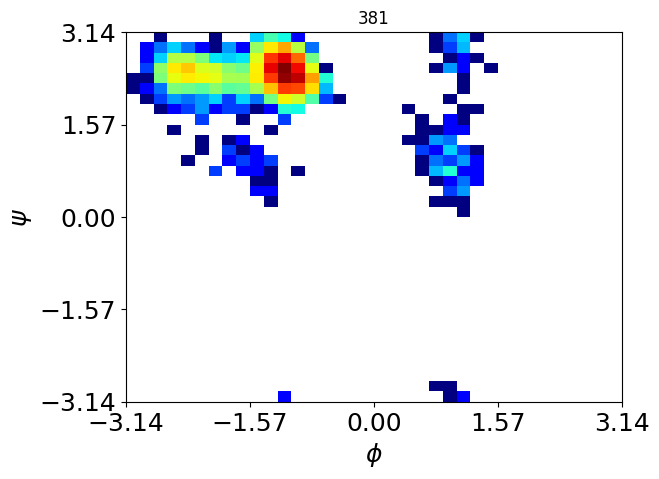

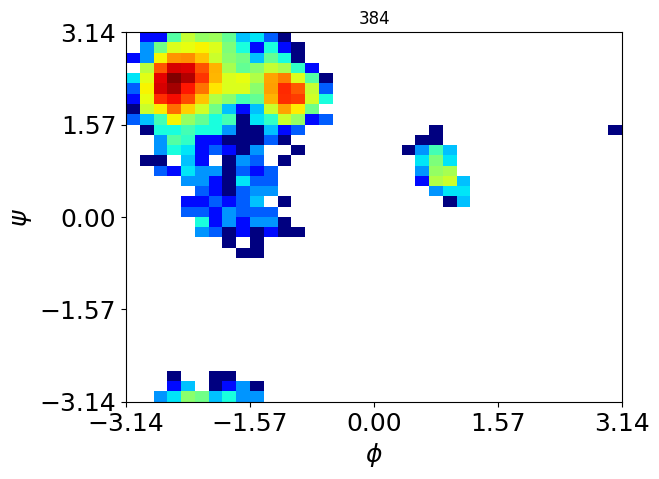

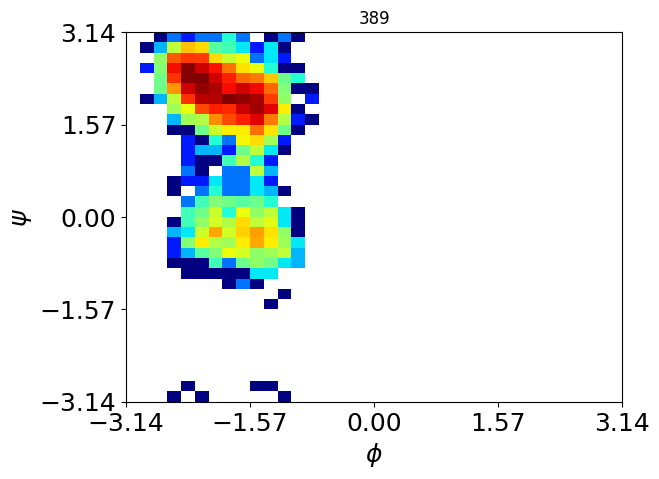

In [95]:
# Here are the rotamers that have two basins:

two_basin_res = [363,381,384,389]
for res in two_basin_res:

    plot_phipsi(res)

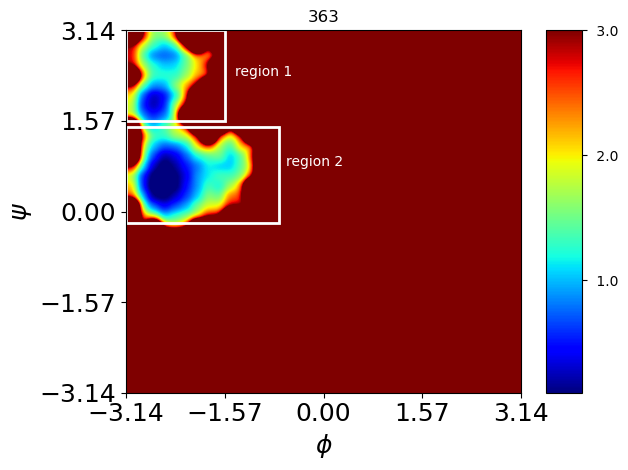

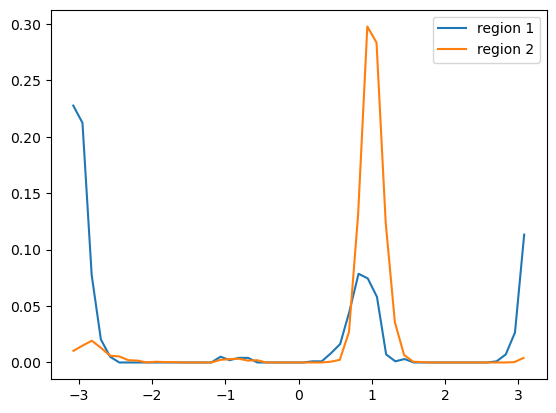

In [27]:
import matplotlib.patches as patches

def hist_chi_1_condition(res,condition):
    if res in dihedral_dict['chi1']:
        data = dihedral_dict['chi1'][res][condition]
        hist, bin_edges = np.histogram(data, bins=50)
    else:
        return
    centers = bin_edges[:-1] + np.diff(bin_edges)/2
    return centers, hist/len(data)



free_energy,xedges,yedges=np.histogram2d(dihedral_dict['psi'][363],dihedral_dict['phi'][363],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
free_energy=np.log(np.flipud(free_energy)+.000001)
T=300                                                                                                  
kbT=T*0.008314/4.184 # kT in kcal/mol
dG=-(kbT)*free_energy #Convert to kcal/mol

fig, ax = plt.subplots()
im = ax.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto',vmin=0.1, vmax=3.0)

region_1 = patches.Rectangle((-np.pi,np.pi/2), np.pi/2, np.pi/2, fill=False, edgecolor='white', linewidth=2)
region_2 = patches.Rectangle((-np.pi,-0.2), np.pi-0.7, np.pi/2+0.1, fill=False, edgecolor='white', linewidth=2)
ax.add_patch(region_1)
ax.add_patch(region_2)
ax.text(-1.4,0.75*np.pi,"region 1",color = "white")
ax.text(-0.6,0.25*np.pi,"region 2",color = "white")
plt.title(str(363))


cbar_ticks=[0,1,2,3]
fig.colorbar(im, ax = ax, ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
imaxes = plt.gca()                                                                                                 
plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
plt.xlabel('$\phi$', size=18)
plt.ylabel('$\psi$', size=18)
plt.tick_params(labelsize=18)

plt.xticks(size='18')
plt.yticks(size='18')
plt.tight_layout()
plt.show()



condition_1 = (dihedral_dict['psi'][363]>1.57) & (dihedral_dict['phi'][363]<-1.57)

condition_2 = (dihedral_dict['psi'][363]<1.57) & (dihedral_dict['psi'][363]>-0.2) & (dihedral_dict['phi'][363]<-0.7)



plt.plot(*hist_chi_1_condition(363,condition_1),label = "region 1")
plt.plot(*hist_chi_1_condition(363,condition_2),label = "region 2")
plt.legend(loc='upper right')
plt.show()